## Student Assignment Claudia Madzak, ds20m013

Build a <b>decision tree</b> based prediction model for the dataset 1 <b>(multidimensional data)</b> - <br>
(a) select the <b>top-20 features</b> using recursive feature elemination <b>(RFE)</b>; <br>
(b) <b>preprocess/scale</b> data if necessary; <br>
(c) <b>tune</b> the model with respect to the parameter (max-depth) using a <b>hold-out validation</b> with a validation set; <br>
(d) plot the <b>ROC curve</b>

## (b) Preprocessing

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
df = pd.read_table('data.txt',delimiter=",")
df.head()

,adenoma_1,adenoma_1.1,adenoma_8,adenoma_8.1,adenoma_9,adenoma_9.1,adenoma_10,adenoma_10.1,adenoma_11,adenoma_11.1,...,serrated_5,serrated_5.1,serrated_6,serrated_6.1,serrated_7,serrated_7.1,serrated_8,serrated_8.1,serrated_9,serrated_9.1
0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
2,138.120000,127.990000,80.415000,90.896000,106.160000,147.090000,148.730000,126.050000,109.130000,129.700000,...,114.590000,86.424000,163.680000,71.638000,180.110000,136.550000,96.852000,157.810000,93.569000,95.543000
3,1606.800000,3377.900000,1852.100000,1904.300000,1184.400000,822.320000,2412.500000,4752.200000,999.390000,599.950000,...,3014.500000,3500.900000,3253.100000,1822.200000,1198.500000,1316.300000,2071.300000,2732.300000,1163.600000,2240.500000
4,0.003875,0.003564,0.004761,0.004147,0.005518,0.003871,0.003336,0.004188,0.005541,0.005917,...,0.004444,0.003409,0.004869,0.004148,0.003273,0.002442,0.004379,0.004015,0.002199,0.004803


<b>Description: </b><br>
The index of the dataset corresponds to the lesion name (text label). Every lesion appears twice due to the 2 lights. <br>
The first column [0] represents the type of lesion (3 for adenoma, 1 for hyperplasic, and 2 for serrated). <br>
And the second column [1] is the type of light used (1 for WL and 2 for NBI). <br>
Columns 2 to 167: AHT: Autocorrelation Homogeneous Texture (Invariant Gabor Texture) <br>
Columns 168 to 423: Rotational Invariant LBP <br>
Columns 424 to 439: Color Naming <br>
Columns 440 to 452: Discriminative Color <br>
Columns 453 to 459: Hue <br>
Columns 460 to 466: Opponent <br>
Columns 467 to 499: color gray-level co-occurrence matrix <br>
Columns 500 to 599: shapeDNA <br>
Columns 600 to 699: KPCA <br>

In [15]:
# Transposition so that the features are represented in the columns and the index is the lesion description
df1 = df.transpose()

In [17]:
# Access the features due to the descsription above
df1[[0]] # type
df1[[1]] # light
df1.iloc[:,2:168] #AHT
df1.iloc[:,168:424] #Rotational Invariant LBP
df1.iloc[:,424:440] #Color Naming
df1.iloc[:,440:453] #Discriminative Color
df1.iloc[:,453:460] #Hue
df1.iloc[:,460:467] #Opponent
df1.iloc[:,467:500] #color gray-level co-occurrence matrix
df1.iloc[:,500:600] #shapeDNA
df1.iloc[:,600:700] #KPCA

,600,601,602,603,604,605,606,607,608,609,...,690,691,692,693,694,695,696,697,698,699
adenoma_1,0.29770,0.27205,0.25828,0.23727,0.22602,0.21712,0.200340,0.195720,0.181170,0.177850,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
adenoma_1.1,0.29770,0.27205,0.25828,0.23727,0.22602,0.21712,0.200340,0.195720,0.181170,0.177850,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
adenoma_8,0.43483,0.38831,0.29644,0.28167,0.27270,0.22563,0.208110,0.200880,0.180600,0.166340,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531
adenoma_8.1,0.43483,0.38831,0.29644,0.28167,0.27270,0.22563,0.208110,0.200880,0.180600,0.166340,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531
adenoma_9,0.76455,0.50313,0.31281,0.20876,0.10243,0.07030,0.059803,0.034381,0.015559,0.013252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
serrated_7.1,0.62189,0.50238,0.36209,0.30094,0.20917,0.17886,0.164030,0.107070,0.087110,0.083520,...,0.000005,0.000005,0.000005,0.000004,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003
serrated_8,0.49956,0.39681,0.33110,0.30621,0.26509,0.23012,0.216850,0.199080,0.180020,0.150030,...,0.000326,0.000296,0.000290,0.000265,0.000264,0.000242,0.000217,0.000210,0.000206,0.000194
serrated_8.1,0.49956,0.39681,0.33110,0.30621,0.26509,0.23012,0.216850,0.199080,0.180020,0.150030,...,0.000326,0.000296,0.000290,0.000265,0.000264,0.000242,0.000217,0.000210,0.000206,0.000194
serrated_9,0.62756,0.42844,0.38100,0.29530,0.23297,0.20049,0.174960,0.135440,0.115640,0.100590,...,0.000019,0.000017,0.000016,0.000015,0.000014,0.000014,0.000013,0.000012,0.000011,0.000010


concatenate the 2 corresponding vectors with different lights to one vector <br>
Dataframe with 76 rows and 1400 features <br>
it follows .....spaghetti code - sorry for that - but I couldn't figure out the issues I had with the loop

In [34]:
ls = []
ls.append(np.concatenate([df1.iloc[0], df1.iloc[1]]))
ls.append(np.concatenate([df1.iloc[2], df1.iloc[3]]))
ls.append(np.concatenate([df1.iloc[4], df1.iloc[5]]))
ls.append(np.concatenate([df1.iloc[6], df1.iloc[7]]))
ls.append(np.concatenate([df1.iloc[8], df1.iloc[9]]))
ls.append(np.concatenate([df1.iloc[10], df1.iloc[11]]))
ls.append(np.concatenate([df1.iloc[12], df1.iloc[13]]))
ls.append(np.concatenate([df1.iloc[14], df1.iloc[15]]))
ls.append(np.concatenate([df1.iloc[16], df1.iloc[17]]))
ls.append(np.concatenate([df1.iloc[18], df1.iloc[19]]))
ls.append(np.concatenate([df1.iloc[20], df1.iloc[21]]))
ls.append(np.concatenate([df1.iloc[22], df1.iloc[23]]))
ls.append(np.concatenate([df1.iloc[24], df1.iloc[25]]))
ls.append(np.concatenate([df1.iloc[26], df1.iloc[27]]))
ls.append(np.concatenate([df1.iloc[28], df1.iloc[29]]))
ls.append(np.concatenate([df1.iloc[30], df1.iloc[31]]))
ls.append(np.concatenate([df1.iloc[32], df1.iloc[33]]))
ls.append(np.concatenate([df1.iloc[34], df1.iloc[35]]))
ls.append(np.concatenate([df1.iloc[36], df1.iloc[37]]))
ls.append(np.concatenate([df1.iloc[38], df1.iloc[39]]))
ls.append(np.concatenate([df1.iloc[40], df1.iloc[41]]))
ls.append(np.concatenate([df1.iloc[42], df1.iloc[43]]))
ls.append(np.concatenate([df1.iloc[44], df1.iloc[45]]))
ls.append(np.concatenate([df1.iloc[46], df1.iloc[47]]))
ls.append(np.concatenate([df1.iloc[48], df1.iloc[49]]))
ls.append(np.concatenate([df1.iloc[50], df1.iloc[51]]))
ls.append(np.concatenate([df1.iloc[52], df1.iloc[53]]))
ls.append(np.concatenate([df1.iloc[54], df1.iloc[55]]))
ls.append(np.concatenate([df1.iloc[56], df1.iloc[57]]))
ls.append(np.concatenate([df1.iloc[58], df1.iloc[59]]))
ls.append(np.concatenate([df1.iloc[60], df1.iloc[61]]))
ls.append(np.concatenate([df1.iloc[62], df1.iloc[63]]))
ls.append(np.concatenate([df1.iloc[64], df1.iloc[65]]))
ls.append(np.concatenate([df1.iloc[66], df1.iloc[67]]))
ls.append(np.concatenate([df1.iloc[68], df1.iloc[69]]))
ls.append(np.concatenate([df1.iloc[70], df1.iloc[71]]))
ls.append(np.concatenate([df1.iloc[72], df1.iloc[73]]))
ls.append(np.concatenate([df1.iloc[74], df1.iloc[75]]))
ls.append(np.concatenate([df1.iloc[76], df1.iloc[77]]))
ls.append(np.concatenate([df1.iloc[78], df1.iloc[79]]))
ls.append(np.concatenate([df1.iloc[80], df1.iloc[81]]))
ls.append(np.concatenate([df1.iloc[82], df1.iloc[83]]))
ls.append(np.concatenate([df1.iloc[84], df1.iloc[85]]))
ls.append(np.concatenate([df1.iloc[86], df1.iloc[87]]))
ls.append(np.concatenate([df1.iloc[88], df1.iloc[89]]))
ls.append(np.concatenate([df1.iloc[90], df1.iloc[91]]))
ls.append(np.concatenate([df1.iloc[92], df1.iloc[93]]))
ls.append(np.concatenate([df1.iloc[94], df1.iloc[95]]))
ls.append(np.concatenate([df1.iloc[96], df1.iloc[97]]))
ls.append(np.concatenate([df1.iloc[98], df1.iloc[99]]))
ls.append(np.concatenate([df1.iloc[100], df1.iloc[101]]))
ls.append(np.concatenate([df1.iloc[102], df1.iloc[103]]))
ls.append(np.concatenate([df1.iloc[104], df1.iloc[105]]))
ls.append(np.concatenate([df1.iloc[106], df1.iloc[107]]))
ls.append(np.concatenate([df1.iloc[108], df1.iloc[109]]))
ls.append(np.concatenate([df1.iloc[110], df1.iloc[111]]))
ls.append(np.concatenate([df1.iloc[112], df1.iloc[113]]))
ls.append(np.concatenate([df1.iloc[114], df1.iloc[115]]))
ls.append(np.concatenate([df1.iloc[116], df1.iloc[117]]))
ls.append(np.concatenate([df1.iloc[118], df1.iloc[119]]))
ls.append(np.concatenate([df1.iloc[120], df1.iloc[121]]))
ls.append(np.concatenate([df1.iloc[122], df1.iloc[123]]))
ls.append(np.concatenate([df1.iloc[124], df1.iloc[125]]))
ls.append(np.concatenate([df1.iloc[126], df1.iloc[127]]))
ls.append(np.concatenate([df1.iloc[128], df1.iloc[129]]))
ls.append(np.concatenate([df1.iloc[130], df1.iloc[131]]))
ls.append(np.concatenate([df1.iloc[132], df1.iloc[133]]))
ls.append(np.concatenate([df1.iloc[134], df1.iloc[135]]))
ls.append(np.concatenate([df1.iloc[136], df1.iloc[137]]))
ls.append(np.concatenate([df1.iloc[138], df1.iloc[139]]))
ls.append(np.concatenate([df1.iloc[140], df1.iloc[141]]))
ls.append(np.concatenate([df1.iloc[142], df1.iloc[143]]))
ls.append(np.concatenate([df1.iloc[144], df1.iloc[145]]))
ls.append(np.concatenate([df1.iloc[146], df1.iloc[147]]))
ls.append(np.concatenate([df1.iloc[148], df1.iloc[149]]))
ls.append(np.concatenate([df1.iloc[150], df1.iloc[151]]))
df_n = pd.DataFrame(ls, index = ['adenoma_1','adenoma_8','adenoma_9',
                                 'adenoma_10','adenoma_11','adenoma_2','adenoma_12',
                                'adenoma_13','adenoma_14','adenoma_15',
                                 'adenoma_16','adenoma_17','adenoma_18','adenoma_19',
                                'adenoma_20','adenoma_21','adenoma_3','adenoma_22','adenoma_23',
                                 'adenoma_24','adenoma_25','adenoma_26','adenoma_27','adenoma_28',
                                 'adenoma_29','adenoma_30','adenoma_31',
                                'adenoma_4','adenoma_32','adenoma_33','adenoma_34','adenoma_35','adenoma_36',
                                 'adenoma_37','adenoma_38','adenoma_39','adenoma_40','adenoma_5','adenoma_6',
                                 'adenoma_7','hyperplasic_1',
                                'hyperplasic_10','hyperplasic_11','hyperplasic_12','hyperplasic_13','hyperplasic_14',
                                 'hyperplasic_15','hyperplasic_16','hyperplasic_17','hyperplasic_18','hyperplasic_19',
                                 'hyperplasic_2','hyperplasic_20','hyperplasic_21','hyperplasic_3','hyperplasic_4',
                                 'hyperplasic_5','hyperplasic_6', 
                                'hyperplasic_7','hyperplasic_8','hyperplasic_9','serrated_1','serrated_10','serrated_11',
                                 'serrated_12','serrated_13','serrated_14','serrated_15','serrated_2','serrated_3',
                                 'serrated_4','serrated_5','serrated_6','serrated_7','serrated_8','serrated_9'])

In [35]:
df_n.head(9)

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
adenoma_1,3.0,1.0,138.120,1606.80,0.003875,0.005880,0.005213,0.006935,0.007333,0.009580,...,0.013994,0.013532,0.013157,0.012743,0.012613,0.012422,0.012252,0.011377,0.011198,0.011131
adenoma_8,3.0,2.0,80.415,1852.10,0.004761,0.007558,0.005294,0.006863,0.006088,0.007074,...,0.003564,0.003380,0.003232,0.003200,0.003006,0.002985,0.002922,0.002631,0.002610,0.002531
adenoma_9,3.0,2.0,106.160,1184.40,0.005518,0.007645,0.007918,0.009513,0.010927,0.012717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
adenoma_10,3.0,1.0,148.730,2412.50,0.003336,0.007695,0.004139,0.005736,0.005794,0.006697,...,0.020822,0.020115,0.019595,0.019252,0.018897,0.018177,0.018158,0.017587,0.017109,0.016648
adenoma_11,3.0,2.0,109.130,999.39,0.005541,0.007036,0.007159,0.008226,0.008320,0.008857,...,0.000140,0.000129,0.000117,0.000111,0.000106,0.000098,0.000093,0.000082,0.000079,0.000076
adenoma_2,3.0,2.0,153.970,3249.60,0.003140,0.005011,0.004846,0.007393,0.006134,0.008784,...,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001
adenoma_12,3.0,2.0,65.564,1719.40,0.004547,0.008664,0.004932,0.006802,0.009955,0.011800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
adenoma_13,3.0,2.0,142.530,4289.20,0.003244,0.005019,0.003899,0.005245,0.005825,0.007302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
adenoma_14,3.0,2.0,80.391,1216.20,0.004380,0.005952,0.005901,0.007197,0.009619,0.009742,...,0.001502,0.001433,0.001378,0.001283,0.001235,0.001211,0.001149,0.001061,0.001023,0.001006


Setting the target to malignant(1) or benign(0)

In [6]:
df_n['target'] = np.where(df_n[0] == 1.0, 1,0) #1 for malignant, 0 for benign

In [7]:
# Splitting to features and target
x = df_n.loc[:, df_n.columns != 'target']
y = df_n['target']

## (c) Hold-out validation split

In [8]:
# Hold-out validation split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=130)

## (b) Scaling

In [9]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## (c) tune the model with respect to the parameter (max-depth) and (a) select the top-20 features using recursive feature elemination (RFE)

Preparation for the ROC Curve

In [10]:
result_table = pd.DataFrame(columns=['Accuracy','max_depth', 'fpr','tpr','auc'])

for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)
    selector = RFE(model, n_features_to_select=20)
    selector.fit(x_train, y_train)
    result = selector.score(x_test, y_test)
    yproba = selector.predict_proba(x_test)[::,1]
    fpr, tpr, threshold = roc_curve(y_test.values, yproba,pos_label=1)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'Accuracy':result,'max_depth':i,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)
print("Done")

Done


In [11]:
result_table.set_index('max_depth', inplace=True)
result_table

,Accuracy,fpr,tpr,auc
max_depth,,,,
1,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
2,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
3,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
4,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
5,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
6,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
7,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
8,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0
9,1.0,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]",1.0


## (d) plot the ROC curve

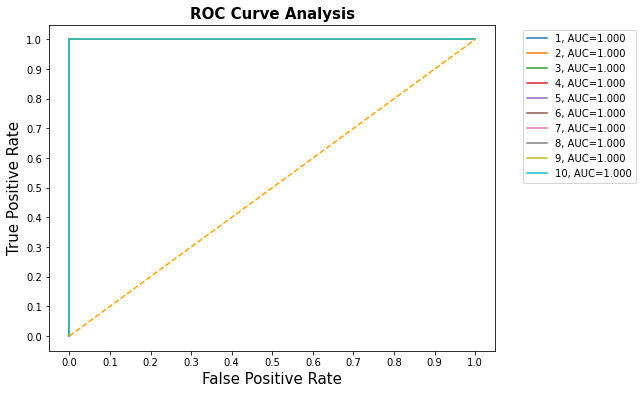

In [12]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10},bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()